In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
df=pd.read_csv("cluster_data.csv")

In [5]:
df

,Feature 1,Feature 2
0,2.698582,-0.672960
1,-0.128113,4.355952
2,2.509049,5.773146
3,-1.518276,3.444886
4,-0.072283,2.883769
...,...,...
495,10.303693,-4.378493
496,-0.730000,6.254563
497,-3.478708,2.257991
498,-2.081214,2.447245


In [7]:
X = df.select_dtypes(include=np.number)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\husna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\husna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\husna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\husna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

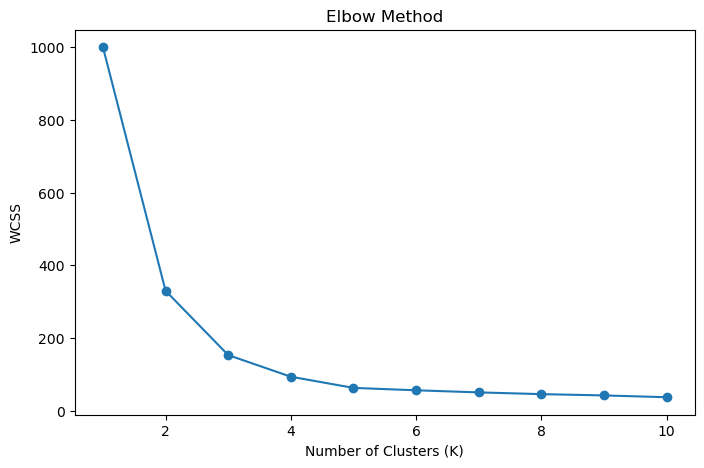

In [9]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        random_state=42
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [10]:
k = 3  # choose optimal K from elbow method

kmeans = KMeans(
    n_clusters=k,
    init="k-means++",
    random_state=42
)

labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df["Cluster"] = labels

print(df.head())


   Feature 1  Feature 2  Cluster
0   2.698582  -0.672960        0
1  -0.128113   4.355952        0
2   2.509049   5.773146        2
3  -1.518276   3.444886        0
4  -0.072283   2.883769        0


c:\Users\husna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


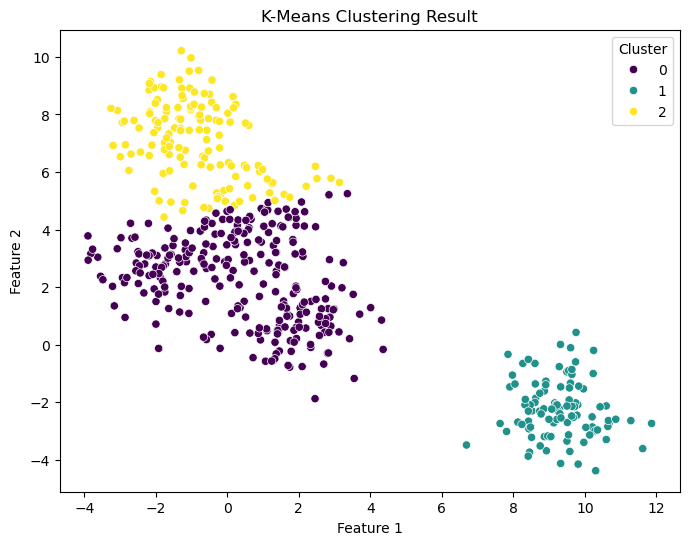

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X.iloc[:, 0],
    y=X.iloc[:, 1],
    hue=df["Cluster"],
    palette="viridis"
)
plt.title("K-Means Clustering Result")
plt.show()


In [12]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=X.columns)

print("Cluster Centers:")
print(centers_df)

Cluster Centers:
   Feature 1  Feature 2
0   0.375361   2.299620
1   9.302869  -2.238027
2  -0.845046   7.125101


In [13]:
silhouette = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette)

Silhouette Score: 0.5363065920716594
